<a href="https://colab.research.google.com/github/Slrosales/Soluciones_Computacionales/blob/main/Polinomio_de_Taylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [87]:
import warnings
import numpy as np
import numpy.linalg as la
import math as mt
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import sympy as sp
from IPython.display import display, Math
from sympy.parsing.sympy_parser import parse_expr

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Función General

In [88]:
def taylor(f,  y=None, n=0, n_fin=4, x0=0, tol=1e-6):
    """
    Calcula la serie de Taylor de una función en torno a x0 y evalúa el valor y si se proporciona.
    :param f: Función (SymPy).
    :param n: Grado inicial del polinomio.
    :param n_fin: Grado final del polinomio.
    :param x0: Punto de expansión.
    :param y: Valor opcional a evaluar.
    :param tol: Tolerancia para detener las iteraciones.
    :return: Lista de polinomios de Taylor.
    """
    x = sp.symbols('x')
    lst = []

    if y is None:
        # No se proporciona un valor y, calcular la serie de Taylor sin evaluar
        for i in range(n, n_fin + 1):
            p = sp.series(expr=f, x=x, x0=x0, n=i).removeO()
            lst.append(p)
            display(Math(sp.latex(p)))
    else:
        # Se proporciona un valor y, calcular la serie de Taylor y evaluar
        p_eval = None
        valor_teorico = None

        for i in range(n, n_fin + 1):
            p = sp.series(expr=f, x=x, x0=x0, n=i).removeO()
            lst.append(p)

            if p_eval is None:
                p_eval = p.subs(x, y).evalf()
                f_eval = f.subs(x, y).evalf()
                valor_teorico = f_eval

                valor_experimental = p_eval
                error_absoluto = abs(valor_teorico - valor_experimental)
                error_relativo = error_absoluto / abs(valor_teorico)

            else:
                p_eval = p.subs(x, y).evalf()
                display(Math(sp.latex(p)))

                valor_experimental = p_eval
                error_absoluto = abs(valor_teorico - valor_experimental)
                error_relativo = error_absoluto / abs(valor_teorico)

                print(f"Iteración {i-n}:")
                print(f"  Valor teórico: {valor_teorico}")
                print(f"  Valor experimental: {valor_experimental}")
                print(f"  Error absoluto: {error_absoluto}")
                print(f"  Error relativo: {error_relativo}\n")

    return lst

In [89]:
def graficar_iter(f, lst, xlim=(-5, 5), ylim=(-2, 2), line_color='g'):
    """
    Grafica la función f y sus iteraciones en una lista lst.
    :param f: Función principal f(x).
    :param lst: Lista de funciones de iteración.
    :param xlim: Límites del eje x en la gráfica.
    :param ylim: Límites del eje y en la gráfica.
    :param line_color: Color de la línea de f(x).
    """
    fig = pls.plot(f,xlim=xlim, ylim=ylim, line_color='g', show=False)

    label = ['$f(x)$']
    for k in range(len(lst)):
      label.append(f"$p_{n+1}")
      fig.extend(pls.plot(lst[k], xlim=xlim,ylim=ylim, show=False))

    fig.legend = True
    fig.show()

In [90]:
x = sp.symbols('x')

# Ejemplo 1

In [91]:
f = sp.sqrt(x+1)
lst = taylor(f, 0.5)

<IPython.core.display.Math object>

Iteración 1:
  Valor teórico: 1.22474487139159
  Valor experimental: 1.00000000000000
  Error absoluto: 0.224744871391589
  Error relativo: 0.183503419072274



<IPython.core.display.Math object>

Iteración 2:
  Valor teórico: 1.22474487139159
  Valor experimental: 1.25000000000000
  Error absoluto: 0.0252551286084111
  Error relativo: 0.0206207261596576



<IPython.core.display.Math object>

Iteración 3:
  Valor teórico: 1.22474487139159
  Valor experimental: 1.21875000000000
  Error absoluto: 0.00599487139158894
  Error relativo: 0.00489479199433381



<IPython.core.display.Math object>

Iteración 4:
  Valor teórico: 1.22474487139159
  Valor experimental: 1.22656250000000
  Error absoluto: 0.00181762860841106
  Error relativo: 0.00148408754416405



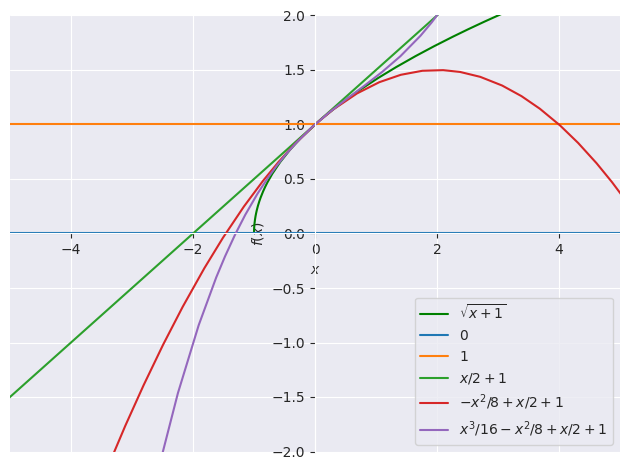

In [92]:
graficar_iter(f, lst)

# Ejemplo 2

In [93]:
f = sp.log(x)/(x+1)
lst = taylor(f, n=1, n_fin=6)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

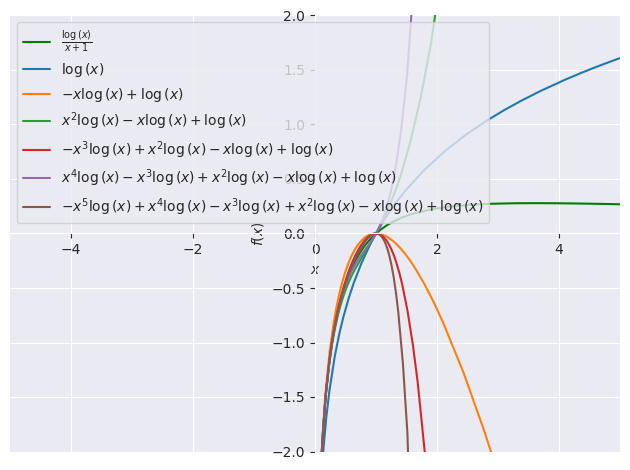

In [94]:
graficar_iter(f, lst)